In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [129]:
df = pd.read_csv('BPI_Challenge_2012.xes.gz_UNPACKED.csv', index_col=[0])
start = time.time()
df.drop(columns=['org:resource'], inplace=True)
df['next_event'] = df['concept:name'].shift(-1)
df['previous_event'] = df['concept:name'].shift(1)
df['pp_event'] = df['concept:name'].shift(2)
df['ppp_event'] = df['concept:name'].shift(3)
df['p_lifecycle:transition'] = df['lifecycle:transition'].shift(1)
df['next_case'] = df['case:concept:name'].shift(-1).fillna(0)
df['next_case1'] = df['next_case'].shift(-1).fillna(0)
# df = df[df['case:concept:name'] == df['next_case1']]
df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='coerce', utc=True)
df['weekday'] = df['datetime'].dt.weekday
df['hour'] =  df['datetime'].dt.hour
df['minute'] =  df['datetime'].dt.minute
df['month'] =  df['datetime'].dt.month
df['next_datetime'] = df['datetime'].shift(-1)
df['timedelta'] = (df['next_datetime'] - df['datetime']).astype('timedelta64[s]')

print(len(df))
df = df[(df['case:concept:name'].astype(int)) == (df['next_case'].astype(int))]
df['previous_timedelta'] = df['timedelta'].shift(1)
print(len(df))
df.dropna(inplace=True)
#df = df.iloc[:20000]
df.iloc[:10]
dfxx = df[['hour', 'minute', 'previous_timedelta']]
dfx = df[['concept:name', 'previous_event', 'lifecycle:transition', 'pp_event', 'ppp_event', 'p_lifecycle:transition', 'weekday', 'month']]
dfy = df[['timedelta']]
valx = dfx
valy = dfy
dummies = pd.get_dummies(dfx.astype('str'))
dfx = dfxx.join(dummies)
#dfx = dummies.join(df[['day, hour', 'minute', 'month']])
trainlen = int(len(df)*0.8)
# dfx.iloc[:10]
# dfx = dfx.to_numpy()
# dfy = dfy.to_numpy()
x_train, y_train = dfx[:trainlen], dfy[:trainlen]
x_test, y_test = dfx[trainlen:], dfy[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
print(len(df))
df.iloc[20:100]

262200
249113
249110


,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,next_event,previous_event,pp_event,ppp_event,p_lifecycle:transition,next_case,next_case1,datetime,weekday,hour,minute,month,next_datetime,timedelta,previous_timedelta
23,COMPLETE,O_ACCEPTED,2011-10-13 10:37:29.226000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,A_ACTIVATED,A_APPROVED,A_REGISTERED,W_Valideren aanvraag,COMPLETE,173688.0,173688.0,2011-10-13 08:37:29.226000+00:00,3,8,37,10,2011-10-13 08:37:29.226000+00:00,0.0,0.0
24,COMPLETE,A_ACTIVATED,2011-10-13 10:37:29.226000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,W_Valideren aanvraag,O_ACCEPTED,A_APPROVED,A_REGISTERED,COMPLETE,173688.0,173691.0,2011-10-13 08:37:29.226000+00:00,3,8,37,10,2011-10-13 08:37:37.026000+00:00,7.0,0.0
26,COMPLETE,A_SUBMITTED,2011-10-01 08:08:58.256000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_PARTLYSUBMITTED,W_Valideren aanvraag,A_ACTIVATED,O_ACCEPTED,COMPLETE,173691.0,173691.0,2011-10-01 06:08:58.256000+00:00,5,6,8,10,2011-10-01 06:09:02.195000+00:00,3.0,7.0
27,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 08:09:02.195000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_PREACCEPTED,A_SUBMITTED,W_Valideren aanvraag,A_ACTIVATED,COMPLETE,173691.0,173691.0,2011-10-01 06:09:02.195000+00:00,5,6,9,10,2011-10-01 06:09:56.648000+00:00,54.0,3.0
28,COMPLETE,A_PREACCEPTED,2011-10-01 08:09:56.648000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,A_PARTLYSUBMITTED,A_SUBMITTED,W_Valideren aanvraag,COMPLETE,173691.0,173691.0,2011-10-01 06:09:56.648000+00:00,5,6,9,10,2011-10-01 06:09:59.578000+00:00,2.0,54.0
29,SCHEDULE,W_Completeren aanvraag,2011-10-01 08:09:59.578000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,A_SUBMITTED,COMPLETE,173691.0,173691.0,2011-10-01 06:09:59.578000+00:00,5,6,9,10,2011-10-01 09:37:32.393000+00:00,12452.0,2.0
30,START,W_Completeren aanvraag,2011-10-01 11:37:32.393000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,SCHEDULE,173691.0,173691.0,2011-10-01 09:37:32.393000+00:00,5,9,37,10,2011-10-01 09:43:13.178000+00:00,340.0,12452.0
31,COMPLETE,W_Completeren aanvraag,2011-10-01 11:43:13.178000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,START,173691.0,173691.0,2011-10-01 09:43:13.178000+00:00,5,9,43,10,2011-10-01 12:27:57.775000+00:00,9884.0,340.0
32,START,W_Completeren aanvraag,2011-10-01 14:27:57.775000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,COMPLETE,173691.0,173691.0,2011-10-01 12:27:57.775000+00:00,5,12,27,10,2011-10-01 12:33:54.614000+00:00,356.0,9884.0
33,COMPLETE,A_ACCEPTED,2011-10-01 14:33:54.614000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_FINALIZED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,START,173691.0,173691.0,2011-10-01 12:33:54.614000+00:00,5,12,33,10,2011-10-01 12:35:46.016000+00:00,111.0,356.0


In [130]:
x_test

<tf.Tensor: shape=(49822, 119), dtype=float64, numpy=
array([[1.8000e+01, 8.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.8000e+01, 8.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9000e+01, 3.0000e+00, 3.2690e+03, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.2000e+01, 5.2000e+01, 4.3000e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.0000e+00, 2.6000e+01, 3.4485e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.0000e+00, 2.7000e+01, 5.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])>

In [131]:
y_test[:1]

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[1.]])>

In [132]:
df=df.iloc[:20000]
#df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='raise', format='%Y-%m-%d %H:%M:%S%z')
df.info()
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 3 to 20958
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lifecycle:transition    20000 non-null  object             
 1   concept:name            20000 non-null  object             
 2   time:timestamp          20000 non-null  object             
 3   case:REG_DATE           20000 non-null  object             
 4   case:concept:name       20000 non-null  int64              
 5   case:AMOUNT_REQ         20000 non-null  int64              
 6   next_event              20000 non-null  object             
 7   previous_event          20000 non-null  object             
 8   pp_event                20000 non-null  object             
 9   ppp_event               20000 non-null  object             
 10  p_lifecycle:transition  20000 non-null  object             
 11  next_case               20000 non-null  f

In [133]:
# s = df['datetime']
# s3 = pd.to_datetime(s, infer_datetime_format=True)

In [134]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [135]:
y_train[:1]

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[39427.]])>

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 119)               0         
                                                                 
 batch_normalization_25 (Bat  (None, 119)              476       
 chNormalization)                                                
                                                                 
 dense_59 (Dense)            (None, 228)               27360     
                                                                 
 batch_normalization_26 (Bat  (None, 228)              912       
 chNormalization)                                                
                                                                 
 dense_60 (Dense)            (None, 128)               29312     
                                                                 
 batch_normalization_27 (Bat  (None, 128)            

In [146]:
predictions = model(x_train[:1]).numpy()
predictions

array([[1.1629587]], dtype=float32)

In [147]:
tf.nn.softmax(predictions).numpy()

array([[1.]], dtype=float32)

In [149]:
loss_fn(y_train[:1], predictions).numpy()

1554396500.0

In [178]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(119,1)),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(228, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(36, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(120,1)),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(10, activation='relu'),
#   tf.keras.layers.Dense(1, activation='relu')
# ])
model.summary()
loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

adagrad = tf.keras.optimizers.Adagrad(
    learning_rate=0.1,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad"
)
ftrl = tf.keras.optimizers.Ftrl(
    learning_rate=0.1,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.01,
    l2_regularization_strength=0.01,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.01,
    beta=0.1)
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.1, nesterov=False, name="SGD", )

model.compile(optimizer=ftrl,
              loss=loss_fn,
              metrics=['mean_absolute_error'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 119)               0         
                                                                 
 batch_normalization_49 (Bat  (None, 119)              476       
 chNormalization)                                                
                                                                 
 dense_89 (Dense)            (None, 228)               27360     
                                                                 
 batch_normalization_50 (Bat  (None, 228)              912       
 chNormalization)                                                
                                                                 
 dense_90 (Dense)            (None, 128)               29312     
                                                                 
 batch_normalization_51 (Bat  (None, 128)            

In [179]:
model.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.2, shuffle=True)

Epoch 1/5
312/312 [==============================] - 6s 15ms/step - loss: 18589667328.0000 - mean_absolute_error: 42447.1016 - val_loss: 14817975296.0000 - val_mean_absolute_error: 37024.0703
Epoch 2/5
312/312 [==============================] - 7s 21ms/step - loss: 16302845952.0000 - mean_absolute_error: 38708.8320 - val_loss: 14611694592.0000 - val_mean_absolute_error: 37761.9766
Epoch 3/5
312/312 [==============================] - 6s 20ms/step - loss: 16274460672.0000 - mean_absolute_error: 37744.9805 - val_loss: 14748700672.0000 - val_mean_absolute_error: 37963.5820
Epoch 4/5
312/312 [==============================] - 6s 20ms/step - loss: 16222158848.0000 - mean_absolute_error: 37512.7383 - val_loss: 14713141248.0000 - val_mean_absolute_error: 38988.7930
Epoch 5/5
312/312 [==============================] - 6s 20ms/step - loss: 16173135872.0000 - mean_absolute_error: 37560.4570 - val_loss: 14737238016.0000 - val_mean_absolute_error: 39494.5078


In [180]:
model.evaluate(x_test,  y_test, verbose=2)

1557/1557 - 7s - loss: 10692246528.0000 - mean_absolute_error: 33520.3867 - 7s/epoch - 4ms/step


[10692246528.0, 33520.38671875]

1557/1557 - 6s - loss: 16145751040.0000 - mean_absolute_error: 38487.3203 - 6s/epoch - 4ms/step
[16145751040.0, 38487.3203125] 100 epoch

1557/1557 - 6s - loss: 12990233600.0000 - mean_absolute_error: 39434.7891 - 6s/epoch - 4ms/step
[12990233600.0, 39434.7890625] 10 epoch

1557/1557 - 6s - loss: 12379001856.0000 - mean_absolute_error: 39955.4883 - 6s/epoch - 4ms/step
[12379001856.0, 39955.48828125] 5 epoch

1557/1557 - 7s - loss: 16281440256.0000 - mean_absolute_error: 34248.9844 - 7s/epoch - 4ms/step
[16281440256.0, 34248.984375] rmsprop 5epoch

1557/1557 - 6s - loss: 13425792000.0000 - mean_absolute_error: 38229.3945 - 6s/epoch - 4ms/step
[13425792000.0, 38229.39453125] ftrl 5 epoch

1557/1557 - 6s - loss: 12477991936.0000 - mean_absolute_error: 38378.7773 - 6s/epoch - 4ms/step
[12477991936.0, 38378.77734375] ftrl 25 epoch

1557/1557 - 6s - loss: 13436874752.0000 - mean_absolute_error: 37503.7383 - 6s/epoch - 4ms/step
[13436874752.0, 37503.73828125] ftrl 20 epoch 

1557/1557 - 6s - loss: 12613310464.0000 - mean_absolute_error: 36718.5391 - 6s/epoch - 4ms/step
[12613310464.0, 36718.5390625] ftrl shrinkage 0.1 beta 0.1 20 epoch 

1557/1557 - 6s - loss: 22985072640.0000 - mean_absolute_error: 38325.5352 - 6s/epoch - 4ms/step
[22985072640.0, 38325.53515625] 100 epoch

1557/1557 - 5s - loss: 11458832384.0000 - mean_absolute_error: 36769.4922 - 5s/epoch - 3ms/step
[11458832384.0, 36769.4921875] 20 epoch

1557/1557 - 6s - loss: 10764874752.0000 - mean_absolute_error: 33928.1797 - 6s/epoch - 4ms/step
[10764874752.0, 33928.1796875] 5 epoch

1557/1557 - 7s - loss: 10972633088.0000 - mean_absolute_error: 34962.5430 - 7s/epoch - 4ms/step
[10972633088.0, 34962.54296875] l2 in model, no dropout

1557/1557 - 6s - loss: 10712907776.0000 - mean_absolute_error: 33294.6133 - 6s/epoch - 4ms/step
[10712907776.0, 33294.61328125] 0.01 l1, l2

1557/1557 - 6s - loss: 12210000896.0000 - mean_absolute_error: 44738.8945 - 6s/epoch - 4ms/step
[12210000896.0, 44738.89453125]

1557/1557 - 6s - loss: 10496494592.0000 - mean_absolute_error: 31814.3359 - 6s/epoch - 4ms/step
[10496494592.0, 31814.3359375]

In [181]:
predictions = model(x_test).numpy()
#pd.Series(predictions[:,0])

In [182]:
tf.nn.softmax(model.predict(x_train[:2]))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [183]:
data = pd.Series(predictions[:,0])
df = pd.DataFrame(data, columns=['prediction'])
print(len(df))
df.dropna(inplace=True)
print(len(df))
comp = valy.copy()
#comp = valx.join(comp)
valx.reset_index(inplace=True, drop=True)
comp.reset_index(inplace=True, drop=True)
comp['prediction'] = pd.Series(predictions[:,0])
#valy.join(df)
#comp = comp.astype(int)
comp.iloc[:500]
#valx.iloc[:10]
valx['timedelta'] = comp['timedelta']
valx['prediction'] = comp['prediction']
valx['absolute_error'] = abs(valx['prediction'] - valx['timedelta'])
valx['logerror'] = np.log10(valx['absolute_error'])
valx.iloc[:200]


49822
49822


,concept:name,previous_event,lifecycle:transition,pp_event,ppp_event,p_lifecycle:transition,weekday,month,timedelta,prediction,absolute_error,logerror
0,W_Completeren aanvraag,A_PREACCEPTED,SCHEDULE,A_PARTLYSUBMITTED,A_SUBMITTED,COMPLETE,4,9,1.0,5444.338867,5443.338867,3.735865
1,W_Completeren aanvraag,W_Completeren aanvraag,START,A_PREACCEPTED,A_PARTLYSUBMITTED,SCHEDULE,5,10,3269.0,34404.246094,31135.246094,4.493252
2,A_ACCEPTED,W_Completeren aanvraag,COMPLETE,W_Completeren aanvraag,A_PREACCEPTED,START,5,10,357.0,112.626694,244.373306,2.388054
3,O_SELECTED,A_ACCEPTED,COMPLETE,W_Completeren aanvraag,W_Completeren aanvraag,COMPLETE,5,10,125.0,118.580643,6.419357,0.807492
4,A_FINALIZED,O_SELECTED,COMPLETE,A_ACCEPTED,W_Completeren aanvraag,COMPLETE,5,10,0.0,7282.982910,7282.982910,3.862309
5,O_CREATED,A_FINALIZED,COMPLETE,O_SELECTED,A_ACCEPTED,COMPLETE,5,10,1.0,116.992004,115.992004,2.064428
6,O_SENT,O_CREATED,COMPLETE,A_FINALIZED,O_SELECTED,COMPLETE,5,10,0.0,220.875778,220.875778,2.344148
7,W_Nabellen offertes,O_SENT,SCHEDULE,O_CREATED,A_FINALIZED,COMPLETE,5,10,0.0,303.108368,303.108368,2.481598
8,W_Completeren aanvraag,W_Nabellen offertes,COMPLETE,O_SENT,O_CREATED,SCHEDULE,5,10,1.0,126.934753,125.934753,2.100146
9,W_Nabellen offertes,W_Completeren aanvraag,START,W_Nabellen offertes,O_SENT,COMPLETE,5,10,27.0,258606.468750,258579.468750,5.412594


<AxesSubplot:>

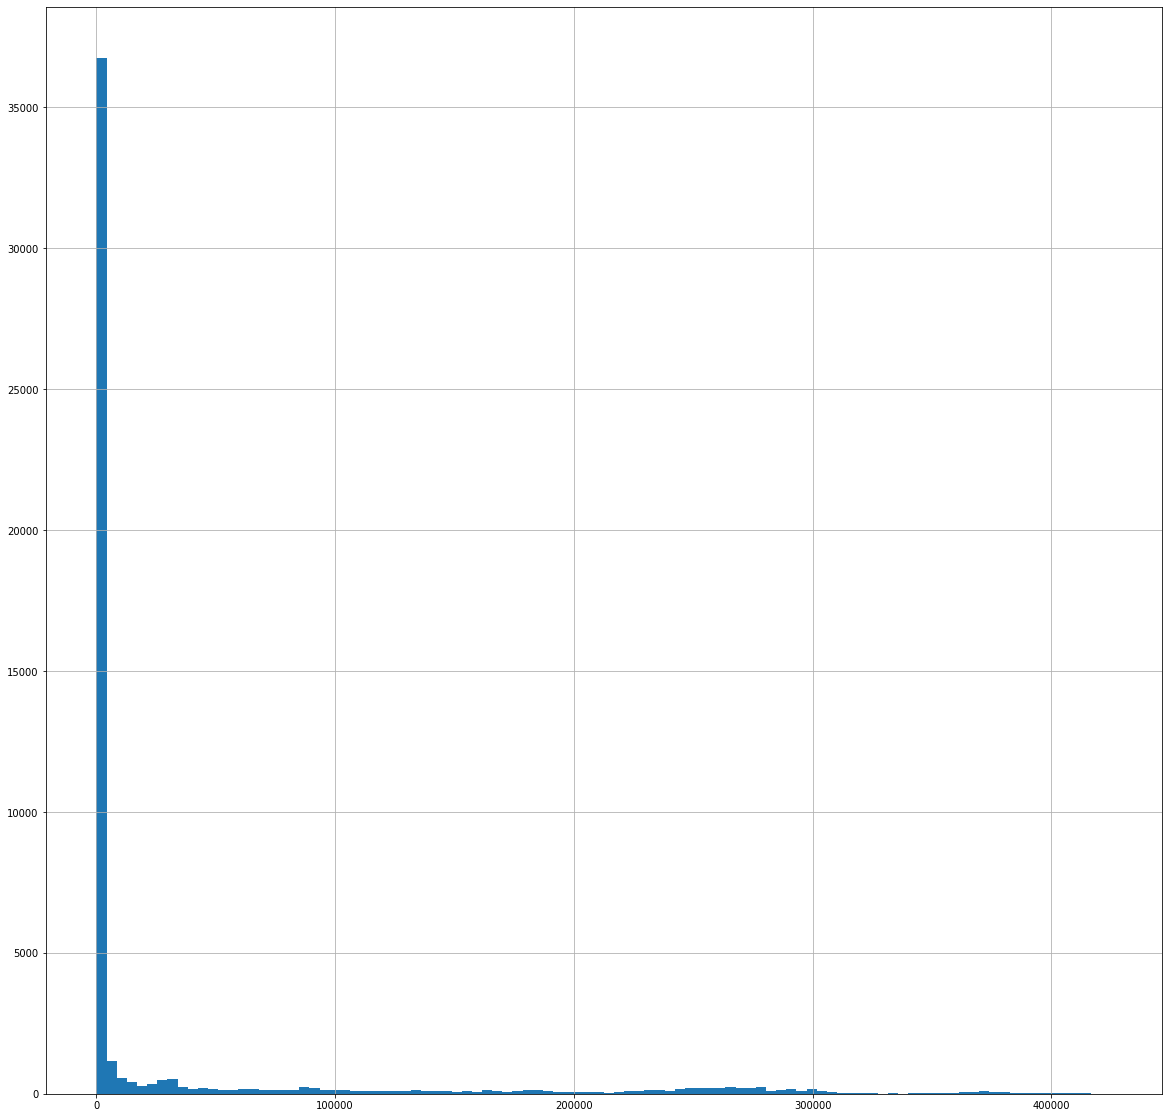

In [184]:
# valx['logerror'].hist(bins=100, figsize=(20,20))
valx['prediction'].hist(bins=100, figsize=(20,20))

In [187]:
end = time.time()
total_time = end-start
print(total_time)

1550.3815109729767
